In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [3]:
file_id = '1C3bVCWN3IxTbDLLAvP6vdXlVDLWBzRtM'
link = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(link)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
c_impute = SimpleImputer(missing_values= "No Info", strategy = 'most_frequent')
data[['smoking_history']] = c_impute.fit_transform(data[['smoking_history']])

In [4]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,never,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,never,27.32,6.2,90,0
99996,Female,2.0,0,0,never,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<ipython-input-23-7a6050b61f2e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True, cmap='mako')


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

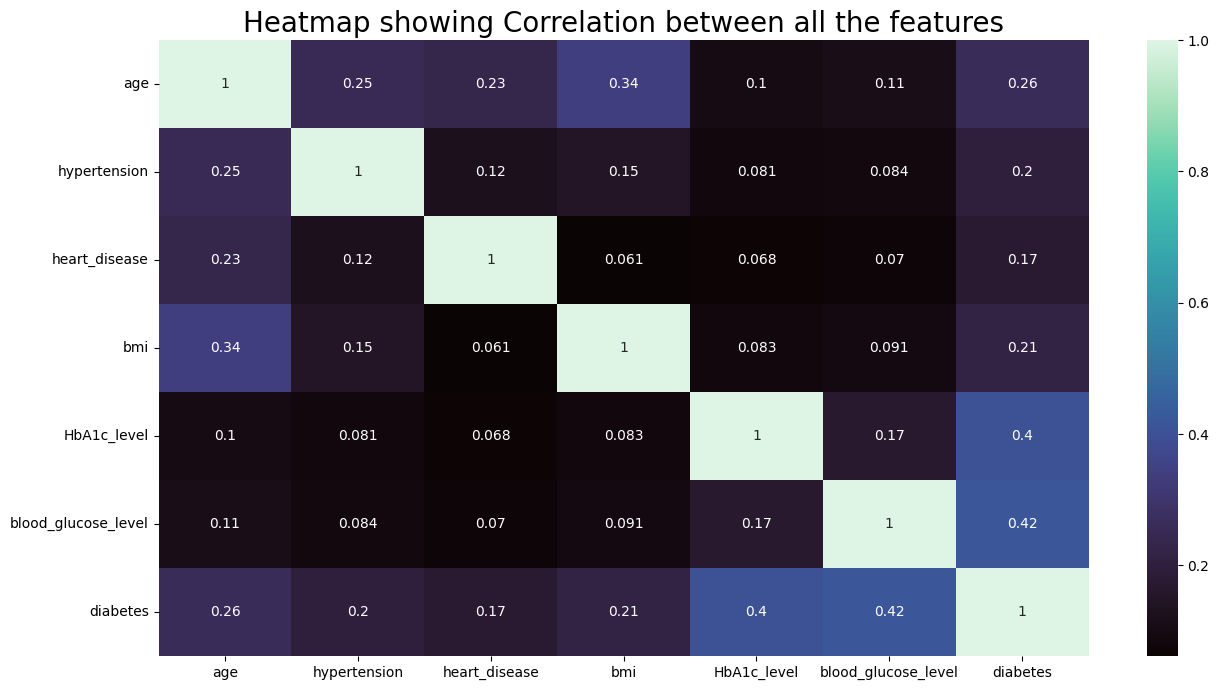

In [23]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(data.corr(),annot = True, cmap='mako')

In [74]:
data = data.drop('gender', axis =1)
data = data.drop('smoking_history', axis =1)
x = data.drop('diabetes', axis =1)

y = data['diabetes']

print("The independent variable X are",x)

print("The independent variable X are",y)

The independent variable X are         age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  
0                      140  
1                       80  
2                      158  
3                      155  
4                      155  
...                    ...

In [87]:
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100


In [49]:
'''from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["gender","smoking_history"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_feature)],
                                 remainder="passthrough")

X = transformer.fit_transform(x)'''

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.948


In [80]:
predicted = svc.predict(x_test)

In [81]:
print('Accuracy =', svc.score(x_test,y_test)*100)

Accuracy = 94.84666666666666


In [82]:
dataf = {'Predicted': y_pred, 'Actual': y_test}
pd.DataFrame(dataf)

,Predicted,Actual
3582,0,0
60498,0,0
53227,0,0
21333,0,0
3885,0,0
...,...,...
86308,0,0
48870,0,1
34940,0,0
21964,0,0


In [83]:
import pickle
pickle.dump(svc, open('model.pkl', 'wb'))

In [84]:
model = pickle.load(open('model.pkl','rb'))

In [86]:
print(model.predict([[ 3, 0, 0, 19.27, 6.5, 100]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
